In [25]:
%matplotlib notebook
import mahotas as mh
import numpy as np
import matplotlib.pyplot as plt
from colicoords import filter_binaries, iter_subplots
import tifffile

In [2]:
binary = np.load('binary.npy')

In [23]:
bin_500 = tifffile.imread('binary_500photons_predicted.tif')
bin_1000 = tifffile.imread('binary_1000photons_predicted.tif')
bin_10000 = tifffile.imread('binary_10000photons_predicted.tif')

<IPython.core.display.Javascript object>


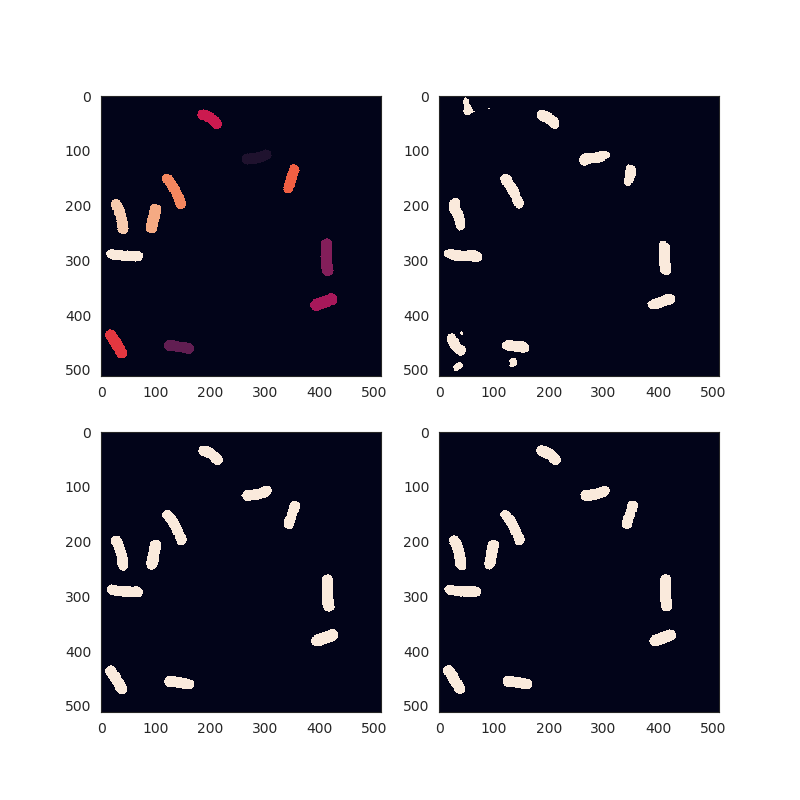

In [29]:
i = 10
fig, axes = iter_subplots(2, 2, figsize=(8,8))
axes[0, 0].iter_imshow(binary)
axes[0, 1].iter_imshow(bin_500)
axes[1, 0].iter_imshow(bin_1000)
axes[1, 1].iter_imshow(bin_10000)
fig.display()

In [30]:
filtered_bin = filter_binaries(binary)
filter_500 = filter_binaries(bin_500)
filter_1000 = filter_binaries(bin_1000)
filter_10000 = filter_binaries(bin_10000)

# Object sizes

In [34]:
def get_sizes(arr):
    sizes = []
    for i, im in enumerate(arr):
        s = mh.labeled.labeled_size(im)
        sizes.append(s[1:])

    sizes_flat = np.concatenate(sizes).flatten()
    sizes_final = sizes_flat[np.nonzero(sizes_flat)]
    
    return sizes_final

In [51]:
sizes_bin = get_sizes(filtered_bin)
sizes_500 = get_sizes(filter_500)
sizes_1000 = get_sizes(filter_1000)
sizes_10000 = get_sizes(filter_10000)

<IPython.core.display.Javascript object>


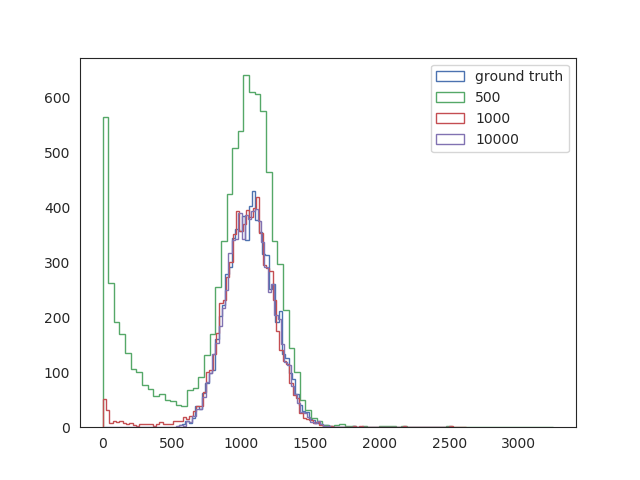

In [50]:
plt.style.use('seaborn-deep')
plt.figure()
h = plt.hist(sizes_bin, bins='fd', label='ground truth', linewidth=1, histtype='step')
h = plt.hist(sizes_500, bins='fd', label='500', linewidth=1, histtype='step')
h = plt.hist(sizes_1000, bins='fd', label='1000', linewidth=1, histtype='step')
h = plt.hist(sizes_10000, bins='fd', label='10000', linewidth=1, histtype='step')
plt.legend()

In [52]:
sizes_bin.min(), sizes_bin.max()

(550, 1824)

In [63]:
0.9*sizes_bin.min(), 1.1*sizes_bin.max()

(495.0, 2006.4)

# Ellipse axes

In [56]:
def get_axes(arr):
    min_list = []
    maj_list = []
    for j, img in enumerate(arr):
        for i in np.unique(img)[1:]:
            selected_binary = (img == i).astype('int')
            min1, max1, min2, max2 = mh.bbox(selected_binary)
            selection = selected_binary[min1:max1, min2:max2]
            major, minor = mh.features.ellipse_axes(selection)
            min_list.append(minor)
            maj_list.append(major)

    min_arr = np.array(min_list)
    maj_arr = np.array(maj_list)
    
    return min_arr, maj_arr

In [57]:
min_bin, maj_bin = get_axes(filtered_bin)
min_500, maj_500 = get_axes(filter_500)
min_1000, maj_1000 = get_axes(filter_1000)
min_10000, maj_10000 = get_axes(filter_10000)

<IPython.core.display.Javascript object>


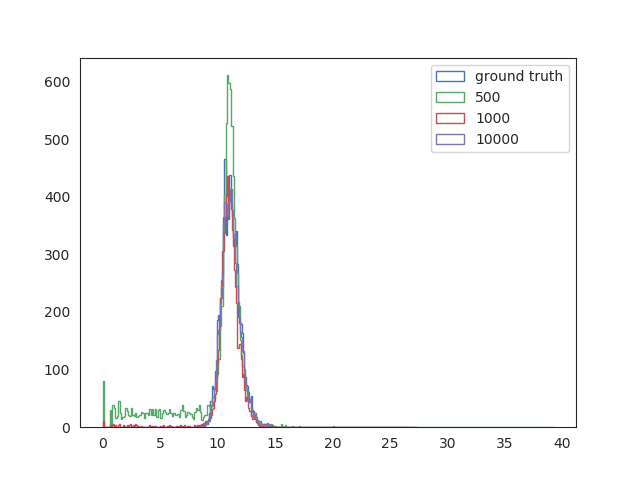

In [59]:
plt.style.use('seaborn-deep')
plt.figure()
h = plt.hist(min_bin, bins='fd', label='ground truth', linewidth=1, histtype='step')
h = plt.hist(min_500, bins='fd', label='500', linewidth=1, histtype='step')
h = plt.hist(min_1000, bins='fd', label='1000', linewidth=1, histtype='step')
h = plt.hist(min_10000, bins='fd', label='10000', linewidth=1, histtype='step')
plt.legend()

<IPython.core.display.Javascript object>


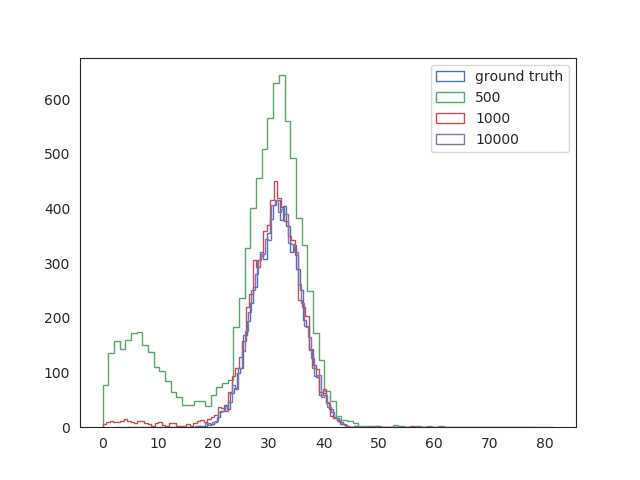

In [58]:
plt.style.use('seaborn-deep')
plt.figure()
h = plt.hist(maj_bin, bins='fd', label='ground truth', linewidth=1, histtype='step')
h = plt.hist(maj_500, bins='fd', label='500', linewidth=1, histtype='step')
h = plt.hist(maj_1000, bins='fd', label='1000', linewidth=1, histtype='step')
h = plt.hist(maj_10000, bins='fd', label='10000', linewidth=1, histtype='step')
plt.legend()

In [60]:
print(min_bin.min(), min_bin.max())
print(maj_bin.min(), maj_bin.max())

8.4103672509044 15.718414144842317
17.122894830631516 49.97336736777403


In [62]:
print(0.9*min_bin.min(), 1.1*min_bin.max())
print(0.9*maj_bin.min(), 1.1*maj_bin.max())

7.56933052581396 17.29025555932655
15.410605347568366 54.97070410455144
